# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [177]:
dados_demograficos = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin1')

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [178]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [179]:
tipos_dados = sinasc_raw.dtypes
print(tipos_dados)

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object


In [180]:
colunas_numericas = sinasc_raw.select_dtypes(include='number').columns
print(colunas_numericas)

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

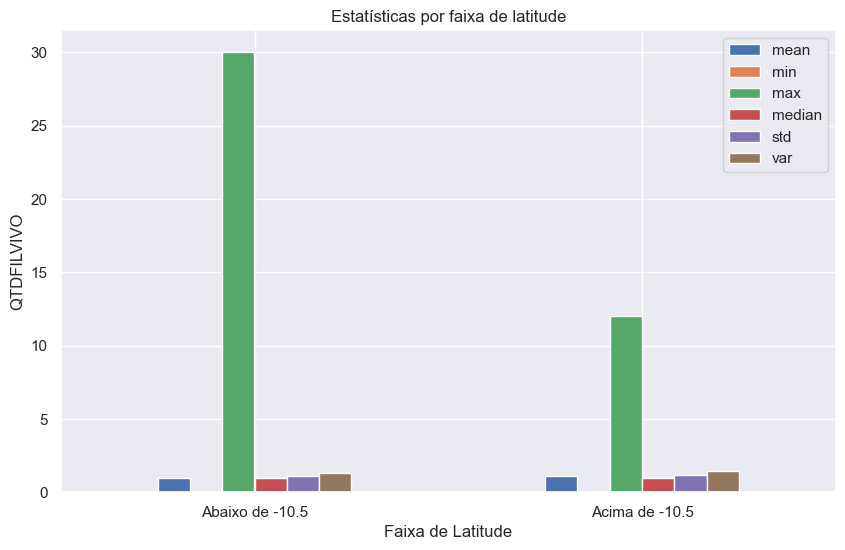

In [181]:
faixas_lat = pd.cut(sinasc_raw['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])

resultado = sinasc_raw.groupby(faixas_lat)['QTDFILVIVO'].agg(['mean', 'min', 'max', 'median', 'std', 'var'])

fig, ax = plt.subplots(figsize=(10, 6))
resultado.plot(kind='bar', ax=ax)

ax.set_xlabel('Faixa de Latitude')
ax.set_ylabel('QTDFILVIVO')
ax.set_title('Estatísticas por faixa de latitude')
plt.setp(plt.gca().get_xticklabels(), rotation=0)

plt.show()

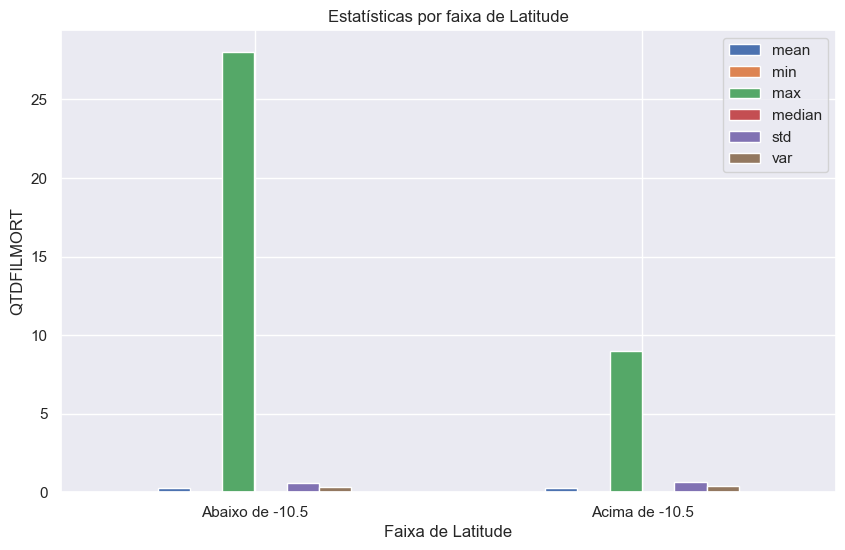

In [182]:
faixas_lat = pd.cut(sinasc_raw['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])

resultado = sinasc_raw.groupby(faixas_lat)['QTDFILMORT'].agg(['mean', 'min', 'max', 'median', 'std', 'var'])

fig, ax = plt.subplots(figsize=(10, 6))
resultado.plot(kind='bar', ax=ax)

ax.set_xlabel('Faixa de Latitude')
ax.set_ylabel('QTDFILMORT')
ax.set_title('Estatísticas por faixa de Latitude')
plt.setp(plt.gca().get_xticklabels(), rotation=0)

plt.show()

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


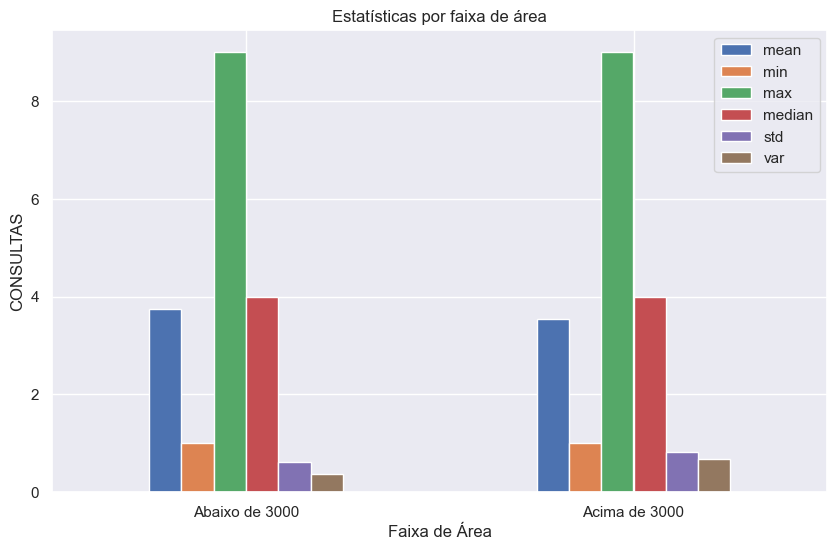

In [183]:
faixas_area = pd.cut(sinasc_raw['munResArea'], bins=[-np.inf, 3000, np.inf], labels=['Abaixo de 3000', 'Acima de 3000'])

resultado = sinasc_raw.groupby(faixas_area)['CONSULTAS'].agg(['mean', 'min', 'max', 'median', 'std', 'var'])

fig, ax = plt.subplots(figsize=(10, 6))
resultado.plot(kind='bar', ax=ax)

ax.set_xlabel('Faixa de Área')
ax.set_ylabel('CONSULTAS')
ax.set_title('Estatísticas por faixa de área')
plt.setp(plt.gca().get_xticklabels(), rotation=0)

plt.show()

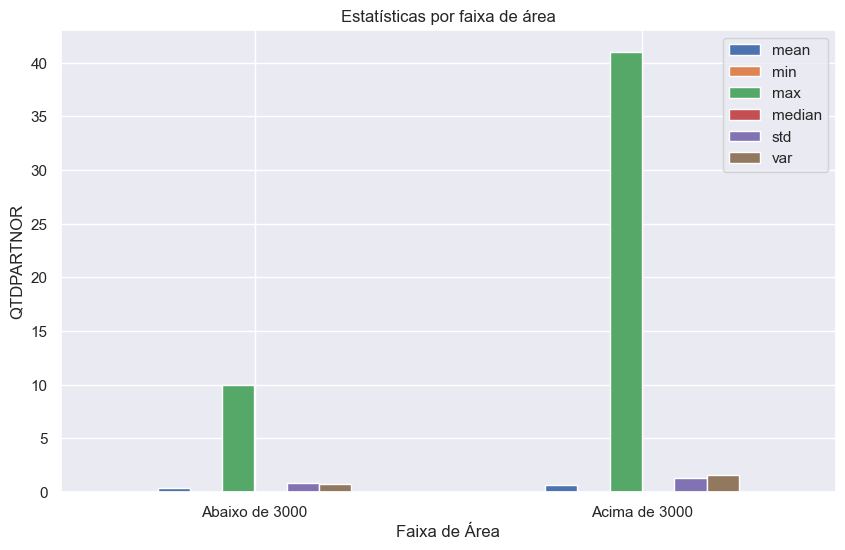

In [184]:
faixas_area = pd.cut(sinasc_raw['munResArea'], bins=[-np.inf, 3000, np.inf], labels=['Abaixo de 3000', 'Acima de 3000'])

resultado = sinasc_raw.groupby(faixas_area)['QTDPARTNOR'].agg(['mean', 'min', 'max', 'median', 'std', 'var'])

fig, ax = plt.subplots(figsize=(10, 6))
resultado.plot(kind='bar', ax=ax)

ax.set_xlabel('Faixa de Área')
ax.set_ylabel('QTDPARTNOR')
ax.set_title('Estatísticas por faixa de área')
plt.setp(plt.gca().get_xticklabels(), rotation=0)

plt.show()

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

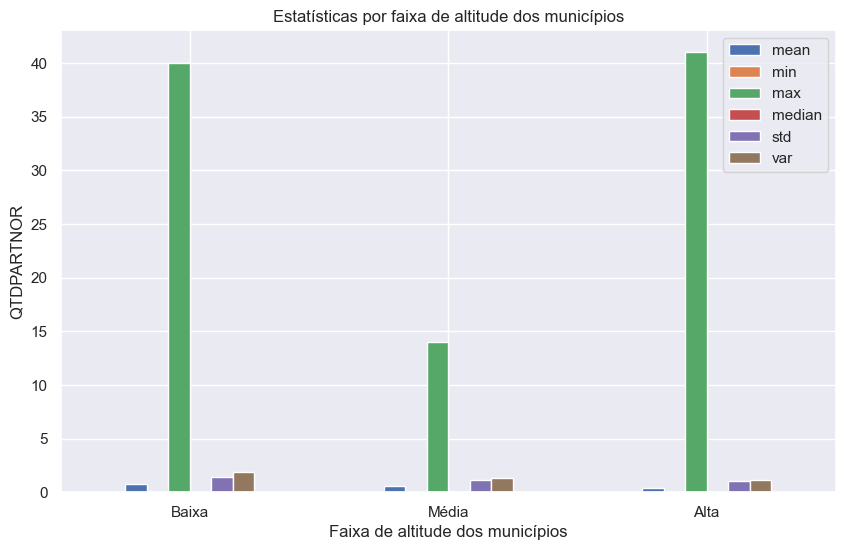

In [185]:
faixas_alt = pd.qcut(sinasc_raw['munResAlt'], q=3, labels=['Baixa', 'Média', 'Alta'])

resultado = sinasc_raw.groupby(faixas_alt)['QTDPARTNOR'].agg(['mean', 'min', 'max', 'median', 'std', 'var'])

fig, ax = plt.subplots(figsize=(10, 6))
resultado.plot(kind='bar', ax=ax)

ax.set_xlabel('Faixa de altitude dos municípios')
ax.set_ylabel('QTDPARTNOR')
ax.set_title('Estatísticas por faixa de altitude dos municípios')
plt.setp(plt.gca().get_xticklabels(), rotation=0)

plt.show()

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [186]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

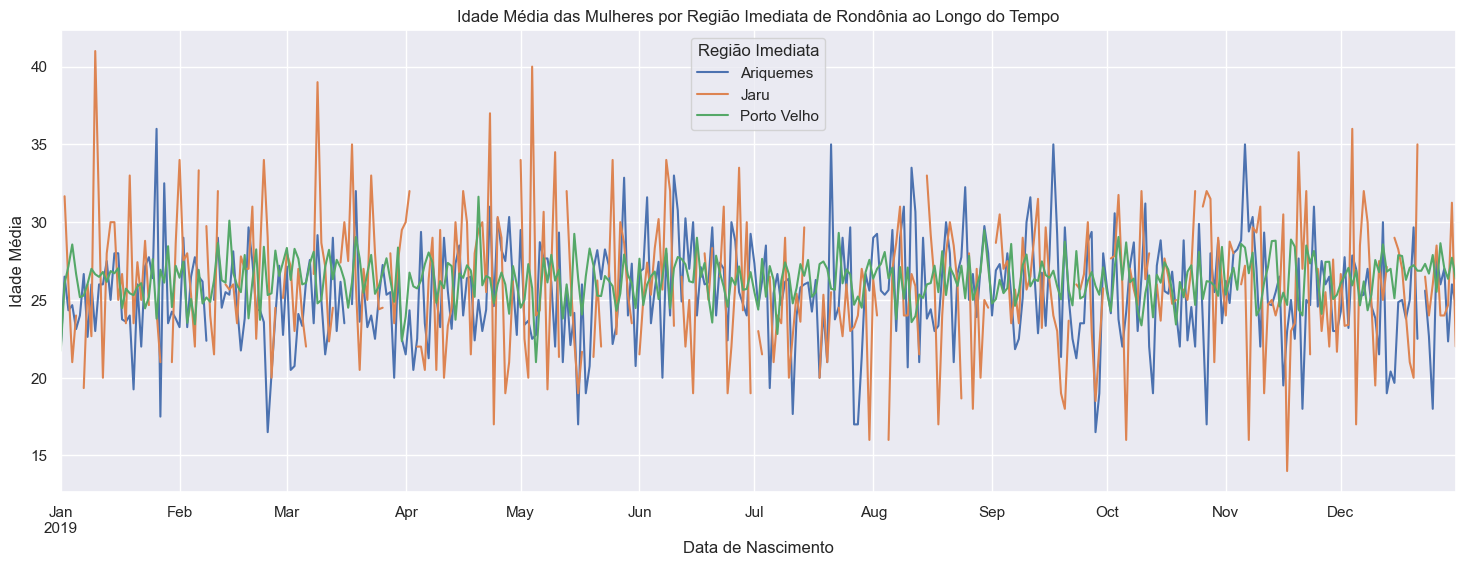

In [193]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

areas_interesse = ['Porto Velho', 'Ariquemes', 'Jaru']
sinasc_filtered = sinasc_raw[sinasc_raw['munResNome'].isin(areas_interesse)]

media_idade_regiao_data = sinasc_filtered.groupby(['regiao_imediata', 'DTNASC'])['IDADEMAE'].mean()

df_media_idade = media_idade_regiao_data.unstack(level='regiao_imediata')

sns.set(style='darkgrid')

plt.figure(figsize=(18, 6))
df_media_idade.plot(ax=plt.gca())
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Média')
plt.legend(title='Região Imediata')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [194]:
faixas_idh = {
    'IDH muito baixo': (0, 0.499),
    'IDH baixo': (0.5, 0.599),
    'IDH médio': (0.6, 0.699),
    'IDH alto': (0.7, 0.799),
    'IDH muito alto': (0.8, 1)
}

dados_demograficos['faixa_idh'] = pd.cut(dados_demograficos['idh'], bins=[faixa[0] for faixa in faixas_idh.values()] + [1], labels=faixas_idh.keys(), right=False)
dados_demograficos = dados_demograficos.sort_values('idh')
dados_demograficos = dados_demograficos.rename(columns={'municipio': 'Município', 'idh': 'IDH', 'faixa_idh': 'Faixa_IDH'})

print(dados_demograficos[['Município', 'IDH', 'Faixa_IDH']])

                    Município    IDH  Faixa_IDH
49              Vale do Anari  0.584  IDH baixo
29                Nova Mamoré  0.587  IDH baixo
30                 Nova União  0.587  IDH baixo
47                  Theobroma  0.589  IDH baixo
1     Alto Alegre dos Parecis  0.592  IDH baixo
9      Campo Novo de Rondônia  0.593  IDH baixo
24         Machadinho D'Oeste  0.596  IDH baixo
19  Governador Jorge Teixeira  0.596  IDH baixo
45               Seringueiras  0.598  IDH baixo
27                Monte Negro  0.607  IDH médio
48                      Urupá  0.609  IDH médio
43   São Francisco do Guaporé  0.611  IDH médio
16              Costa Marques  0.611  IDH médio
17                    Cujubim  0.612  IDH médio
15                 Corumbiara  0.613  IDH médio
21            Itapuã do Oeste  0.614  IDH médio
5                     Buritis  0.616  IDH médio
33                    Parecis  0.617  IDH médio
2                Alto Paraíso  0.625  IDH médio
50            Vale do Paraíso  0.627  ID

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [195]:
faixas_ifdm = {
    'Baixo': (0, 0.399),
    'Regular': (0.4, 0.599),
    'Moderado': (0.6, 0.799),
    'Alto': (0.8, 1)
}

dados_demograficos['faixa_ifdm'] = pd.cut(dados_demograficos['ifdm'], bins=[faixa[0] for faixa in faixas_ifdm.values()] + [1], labels=faixas_ifdm.keys(), right=False)
dados_demograficos = dados_demograficos.sort_values('ifdm')
dados_demograficos = dados_demograficos.rename(columns={'municipio': 'Município', 'ifdm': 'IFDM', 'faixa_ifdm': 'Faixa_IFDM'})

print(dados_demograficos[['Município', 'IFDM', 'Faixa_IFDM']])

                    Município    IFDM Faixa_IFDM
19  Governador Jorge Teixeira  0.4562    Regular
1     Alto Alegre dos Parecis  0.5046    Regular
17                    Cujubim  0.5055    Regular
29                Nova Mamoré  0.5084    Regular
9      Campo Novo de Rondônia  0.5272    Regular
24         Machadinho D'Oeste  0.5322    Regular
47                  Theobroma  0.5405    Regular
11               Castanheiras  0.5430    Regular
33                    Parecis  0.5502    Regular
26           Mirante da Serra  0.5519    Regular
20              Guajará-Mirim  0.5541    Regular
30                 Nova União  0.5571    Regular
16              Costa Marques  0.5626    Regular
25         Ministro Andreazza  0.5657    Regular
49              Vale do Anari  0.5710    Regular
7                 Cacaulândia  0.5721    Regular
2                Alto Paraíso  0.5735    Regular
15                 Corumbiara  0.5759    Regular
50            Vale do Paraíso  0.5818    Regular
28   Nova Brasilândi

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [196]:
faixas_pib = {
    'Faixa 1': (0, 99000),
    'Faixa 2': (100000, 199000),
    'Faixa 3': (200000, 299000),
    'Faixa 4': (300000, 499000),
    'Faixa 5': (500000, 999000),
    'Faixa 6': (1000000, float('inf'))
}

# Função para converter valores do PIB para milhões
#def converter_pib(valor):
    #return valor * 1000
    
dados_demograficos.rename(columns={'PIB': 'pib'}, inplace=True)
dados_demograficos['faixa_pib'] = pd.cut(dados_demograficos['pib'], bins=[faixa[0] for faixa in faixas_pib.values()] + [float('inf')], labels=faixas_pib.keys(), right=False)
dados_demograficos = dados_demograficos.sort_values('pib')

dados_demograficos = dados_demograficos.rename(columns={'municipio': 'Município', 'pib': 'PIB', 'faixa_pib': 'Faixa_PIB'})

print(dados_demograficos[['Município', 'PIB', 'Faixa_PIB']])

                    Município       PIB Faixa_PIB
38      Primavera de Rondônia     52908   Faixa 1
11               Castanheiras     59779   Faixa 1
42         São Felipe D'Oeste     72084   Faixa 1
46              Teixeirópolis     72089   Faixa 1
35       Pimenteiras do Oeste     76756   Faixa 1
39                 Rio Crespo     76854   Faixa 1
33                    Parecis     80759   Faixa 1
30                 Nova União     92346   Faixa 1
49              Vale do Anari    105208   Faixa 2
6                      Cabixi    113031   Faixa 2
7                 Cacaulândia    116635   Faixa 2
50            Vale do Paraíso    116742   Faixa 2
21            Itapuã do Oeste    129351   Faixa 2
31    Novo Horizonte do Oeste    129399   Faixa 2
41        Santa Luzia D'Oeste    135934   Faixa 2
47                  Theobroma    140601   Faixa 2
19  Governador Jorge Teixeira    148027   Faixa 2
26           Mirante da Serra    163955   Faixa 2
45               Seringueiras    169429   Faixa 2


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [198]:
sinasc_df = pd.read_csv("sinasc_RO_2019.csv")
dados_extras_df = pd.read_csv("dados_extras_ro.csv", sep=";")

faixas_idh = {
    "IDH muito baixo": (0, 0.499),
    "IDH baixo": (0.500, 0.599),
    "IDH médio": (0.600, 0.699),
    "IDH alto": (0.700, 0.799),
    "IDH muito alto": (0.800, 1)
}

nascimentos_por_municipio = sinasc_df['munResNome'].value_counts()

municipios_em_comum = set(nascimentos_por_municipio.index).intersection(dados_extras_df['municipio'])

nascimentos_por_faixa_idh = {}
for faixa, (inicio, fim) in faixas_idh.items():
    municipios_na_faixa = dados_extras_df.loc[(dados_extras_df['municipio'].isin(municipios_em_comum)) & (dados_extras_df['idh'] >= inicio) & (dados_extras_df['idh'] <= fim), 'municipio']
    nascimentos_na_faixa = nascimentos_por_municipio.loc[municipios_na_faixa].sum()
    nascimentos_por_faixa_idh[faixa] = nascimentos_na_faixa

for faixa, nascimentos in nascimentos_por_faixa_idh.items():
    print(f"Faixa de IDH: {faixa}")
    print(f"Quantidade de Nascimentos: {nascimentos}")
    print()

Faixa de IDH: IDH muito baixo
Quantidade de Nascimentos: 0

Faixa de IDH: IDH baixo
Quantidade de Nascimentos: 1124

Faixa de IDH: IDH médio
Quantidade de Nascimentos: 5072

Faixa de IDH: IDH alto
Quantidade de Nascimentos: 14673

Faixa de IDH: IDH muito alto
Quantidade de Nascimentos: 0



Com base nos resultados obtidos, podemos obter os seguintes insights:

- Não houve nenhum registro de nascimentos em municípios classificados com IDH muito baixo. Isso pode indicar que esses municípios possuem condições socioeconômicas desfavoráveis que afetam a taxa de natalidade. Lembrando que não houve nascidos em municípios classificados com IDH muito alto pois não há municípios em Rondônia com essa classificação

- A maior quantidade de nascimentos ocorreu em municípios classificados com IDH alto. Isso sugere que municípios com um nível mais elevado de desenvolvimento humano podem proporcionar melhores condições para a maternidade e cuidados com a saúde, o que pode influenciar positivamente a taxa de natalidade.

- Municípios com IDH baixo e médio apresentaram uma quantidade significativa de nascimentos, embora menor em comparação com municípios com IDH alto. Isso indica que, apesar das condições socioeconômicas menos favoráveis, ainda há uma taxa razoável de nascimentos nessas regiões.

Esses insights sugerem uma possível relação entre o Índice de Desenvolvimento Humano (IDH) e a taxa de natalidade nos municípios estudados. 